In [3]:
# Start of ST10032014's PDAN8411 model testing
# Code snippets used from knowledge, the Programming for DANA textbook, and further research referenced where required
# Evaluation of this code is done inside the submitted Word document

In [4]:
# Importing libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and reading our dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Checking for any missing values in the dataset
print(df.info())
print(df.isnull().sum())

# Printing some basic statistics to view
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      3

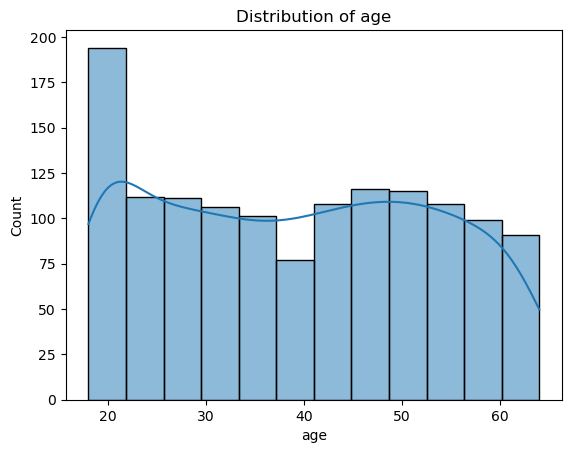

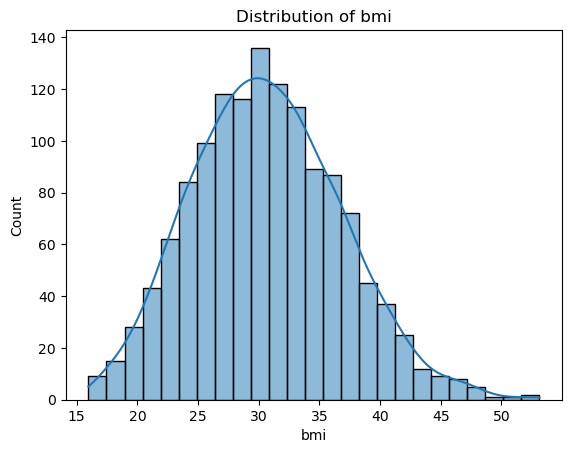

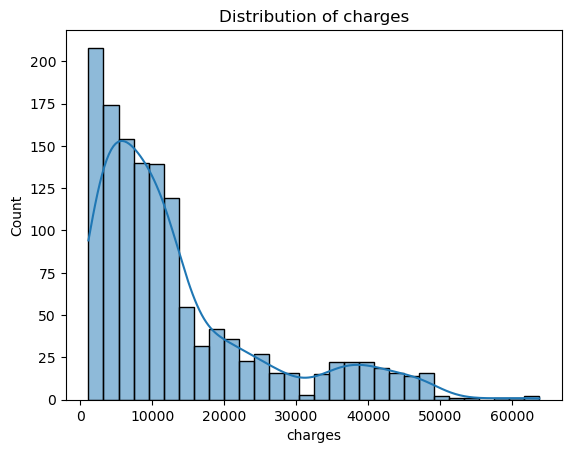

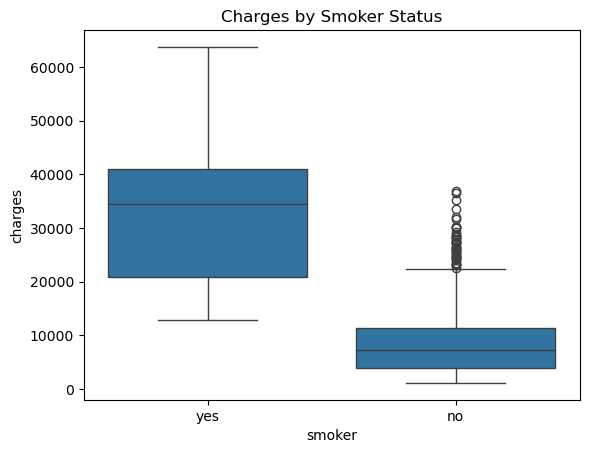

In [6]:
# Plotting distribution plots to view how data is spread
for col in ['age', 'bmi', 'charges']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting various boxplots to spot outliers in the data
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status')
plt.show()

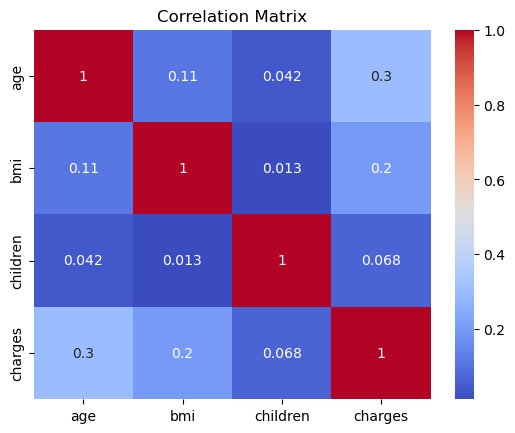

In [7]:
# Plotting a heatmap of the numeric correlation graph
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [8]:
# Converting all categorical variables into numeric format using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [10]:
# Split the dataset into training and testing sets
# 80% of the data is used for training, and 20% is used for testing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Creating and training a Linear Regression model using the training data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

R² Score: 0.7835929767120723
MAE: 4181.19447375365
RMSE: 5796.2846592762735


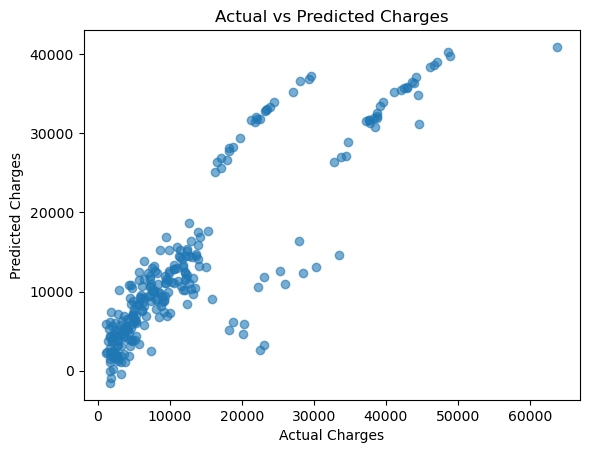

In [12]:
# Importing the evaluation metrics from scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using the trained model to make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluating the model's performance using common regression metrics
print("R² Score:", r2_score(y_test, y_pred)) # Proportion of variance explained by the model
print("MAE:", mean_absolute_error(y_test, y_pred)) # Average absolute difference between actual and predicted values
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) 

# Plotting the Actual vs Predicted charges
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [13]:
# Going to do some retraining now to try and get better results

In [14]:
# Doing some retraining

# Required libraries for modeling, preprocessing, evaluation
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Creating interaction feature between smoker and BMI
if 'smoker_yes' in df_encoded.columns:
    df_encoded['smoker_bmi_interaction'] = df_encoded['smoker_yes'] * df_encoded['bmi']

# Redefine features and target
X_lasso = df_encoded.drop(columns=['charges'])  # features
y_lasso = df_encoded['charges']                 # target

# Split data into training and testing sets (80/20 split)
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    X_lasso, y_lasso, test_size=0.2, random_state=42
)

# Define Lasso model with a regularization strength alpha
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=1.0))

# Train the Lasso model on the training data
lasso_model.fit(X_train_lasso, y_train_lasso)

# Predict medical charges using the trained model on the test set
y_pred_lasso = lasso_model.predict(X_test_lasso)

# Evaluate the retrained model using common regression metrics
r2_lasso = r2_score(y_test_lasso, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_lasso, y_pred_lasso)
mse_lasso = mean_squared_error(y_test_lasso, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Display evaluation results
print("Retrained Model with Lasso Regression:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")

Retrained Model with Lasso Regression:
R² Score: 0.8653
MAE: 2757.94
RMSE: 4573.22


In [15]:
# Clear improvement in results

In [16]:
# Lets do a side by side comparison

Model Performance Comparison:
          Linear Regression  Lasso Regression
Metric                                       
R² Score             0.7836          0.865285
MAE               4181.1900       2757.939640
RMSE              5796.2800       4573.220755


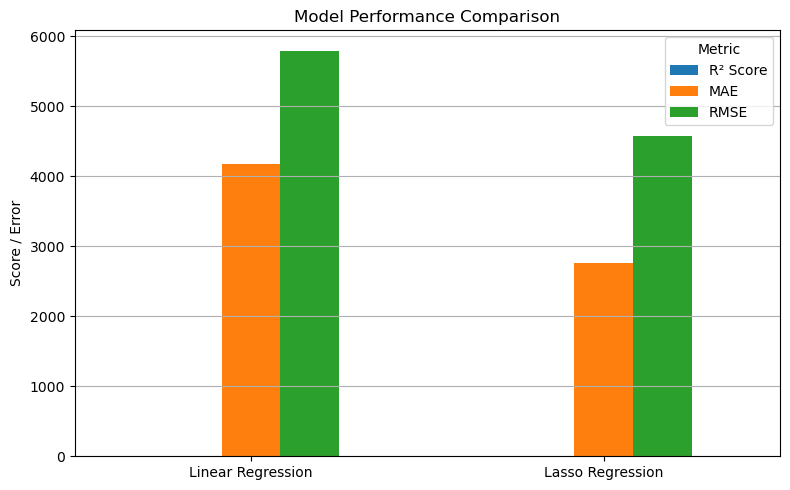

In [17]:
# Final comparisons

import pandas as pd

# Store metrics from the original Linear Regression model
r2_original = 0.7836
mae_original = 4181.19
rmse_original = 5796.28

# Use the metrics from the Lasso model computed earlier
r2_lasso = r2_lasso 
mae_lasso = mae_lasso
rmse_lasso = rmse_lasso

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'RMSE'],
    'Linear Regression': [r2_original, mae_original, rmse_original],
    'Lasso Regression': [r2_lasso, mae_lasso, rmse_lasso]
})

# Format and display
comparison_df.set_index('Metric', inplace=True)
print("Model Performance Comparison:")
print(comparison_df)

# Visualize the comparison with a bar chart
import matplotlib.pyplot as plt

# Transpose the DataFrame for better plotting format and create a bar chart
comparison_df.T.plot(kind='bar', figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score / Error")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
# We have completed oour model training and creation, followed by some successful retraining

In [19]:
### Referemces ###
# Guido, A. C. (2016). Introduction to Machine Learning with Python. California: O’Reilly Media, Inc.
# https://www.geeksforgeeks.org/linear-regression-python-implementation/
# https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8